# Titanic - Machine Learning from Disaster
    Predict survival on the Titanic and get familiar with ML basics

This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

## DATA SOURCE

data is available at https://www.kaggle.com/c/titanic/data

# DATA PREPROCESSING

In [32]:
# IMPORTING LIBRARYS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# LOAD DATA
train=pd.read_csv('C:/Users/manish arram/ml/DATA S/PROJECTS/titanic_train.csv')
test=pd.read_csv('C:/Users/manish arram/ml/DATA S/PROJECTS/test.csv')
train = train.set_index("PassengerId")
test = test.set_index("PassengerId")

In [34]:
df1=pd.concat([train,test],axis=0)

In [35]:
# Encoding
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
change={'female':0,'male':1}
df1.Sex=df1.Sex.map(change)

<AxesSubplot:>

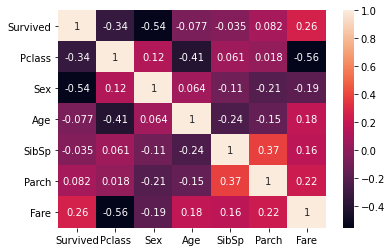

In [36]:
sns.heatmap(df1.corr(),annot=True)

In [37]:
# Fill Age
df1['Age'].fillna(df1.groupby(['Pclass','Sex'])['Age'].transform("mean"),inplace=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

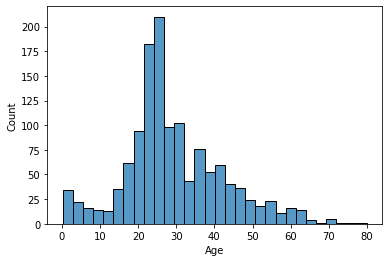

In [38]:
sns.histplot(data=df1,x='Age')

<AxesSubplot:xlabel='Age', ylabel='count'>

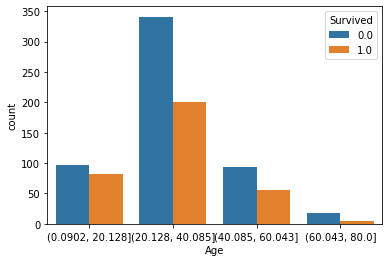

In [39]:
axage=pd.cut(df1['Age'],4)
sns.countplot(x=axage,data=df1,hue='Survived')

In [40]:
axage=pd.cut(df1['Age'],4)

In [41]:
# Fill Fare
df1['Fare'].fillna(df1.groupby(['Pclass','Sex'])['Fare'].transform("median"),inplace=True)

<AxesSubplot:xlabel='Fare', ylabel='count'>

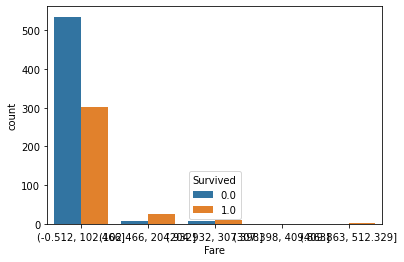

In [42]:
axfare=pd.cut(df1['Fare'],5)
sns.countplot(x=axfare,data=df1,hue='Survived')

In [43]:
# Converting Fare to categorical
df1['Fare']=LabelEncoder().fit_transform(axfare)
pd.crosstab(df1['Fare'],df1['Survived'])

Survived,0.0,1.0
Fare,,
0,535,303
1,8,25
2,6,11
3,0,3


In [44]:
df1.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin       1014
Embarked       2
dtype: int64

In [45]:
# Merge SibSp and Parach
df1['FamilySize']=df1['SibSp']+df1['Parch']+1  # +1 as self
df1.drop(['SibSp','Parch'],axis=1,inplace=True)

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

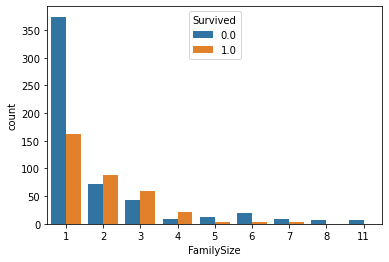

In [46]:
sns.countplot(x='FamilySize',data=df1,hue='Survived')

In [16]:
# Binning FanilySize
df1.loc[df1['FamilySize']==1,'FamilySize']=0 # Alone
df1.loc[(df1['FamilySize']>1) & (df1['FamilySize']<=4),'FamilySize']=1 # Small
df1.loc[(df1['FamilySize']>4) & (df1['FamilySize']<=6),'FamilySize']=2 # Medium
df1.loc[df1['FamilySize']>6,'FamilySize']=3 # Large

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

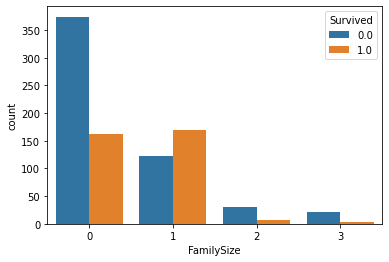

In [17]:
sns.countplot(x='FamilySize',data=df1,hue='Survived')

In [18]:
df1['PassengerId']=df1.index

In [19]:
df1=pd.get_dummies(df1,columns=['Sex','Fare','Pclass'])

In [20]:
df1.head(2)

,Survived,Name,Age,Ticket,Cabin,Embarked,FamilySize,PassengerId,Sex_0,Sex_1,Fare_0,Fare_1,Fare_2,Fare_3,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,
1,0.0,"Braund, Mr. Owen Harris",22.0,A/5 21171,NaN,S,1,1,0,1,1,0,0,0,0,0,1
2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,C85,C,1,2,1,0,1,0,0,0,1,0,0


In [21]:
df1.drop(['Name','Cabin','Ticket','Embarked'],axis=1,inplace=True)

In [22]:
df1.columns

Index(['Survived', 'Age', 'FamilySize', 'PassengerId', 'Sex_0', 'Sex_1',
       'Fare_0', 'Fare_1', 'Fare_2', 'Fare_3', 'Pclass_1', 'Pclass_2',
       'Pclass_3'],
      dtype='object')

In [23]:
# Split
train,test=df1.loc[train.index],df1.loc[test.index]

x=train.drop(['PassengerId','Survived'],axis=1)
y=train['Survived']

train_names=x.columns

X=test.drop(['PassengerId','Survived'],axis=1)

In [24]:
# Scaler
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)
X=StandardScaler().fit_transform(X)

# MODELING

In [25]:
# GridSearchCV FOR HYPERPARAMETER TUNING
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# creating param
model_param={
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{
            'criterion':['gini','entropy']
        }
    },
    
    'KNeighborsClassifier':{
         'model':KNeighborsClassifier(),
         'param':{
            'n_neighbors':[1,2,3,4,5,6,7,8,9,10]
         }
    },
    
    'SVC':{
        'model':SVC(),
        'param':{
            'kernel':['rbf','poly','linear','sigmoid'],
            'C':[0.1,0.5,1,1.5,2,3,4,5],
        }
    },
    
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'criterion':['gini','entropy'],
            'n_estimators':[1,5,10,20,30,40,50]
        }
    }
    
}
#
scores=[]
for model_name, mp in model_param.items():
    model_selection=GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(x,y)
    scores.append({
        'model':model_name,
        'best_score':model_selection.best_score_,
        'best_params':model_selection.best_params_
    })
#    
df_model_score=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model_score

,model,best_score,best_params
0,DecisionTreeClassifier,0.814808,{'criterion': 'gini'}
1,KNeighborsClassifier,0.820482,{'n_neighbors': 3}
2,SVC,0.828272,"{'C': 1, 'kernel': 'poly'}"
3,RandomForestClassifier,0.826037,"{'criterion': 'entropy', 'n_estimators': 40}"


In [26]:
# Training models
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

# ml1 logistic 
from sklearn.linear_model import LogisticRegression
ml1=LogisticRegression()
ml1.fit(x_train,y_train)

ml1_pred_test=ml1.predict(x_test)
ml1_pred_train=ml1.predict(x_train)

# ml2 KNN
from sklearn.neighbors import KNeighborsClassifier
ml2=KNeighborsClassifier(n_neighbors=9)
ml2.fit(x_train,y_train)

ml2_pred_test=ml2.predict(x_test)
ml2_pred_train=ml2.predict(x_train)

# ml3 SVM (linear kernal)
from sklearn.svm import SVC
ml3= SVC(kernel='linear',random_state=0)
ml3.fit(x_train,y_train)

ml3_pred_test=ml3.predict(x_test)
ml3_pred_train=ml3.predict(x_train)

# ml4 SVM (rbf kernal)
from sklearn.svm import SVC
ml4= SVC(kernel='rbf',C=3,random_state=0)
ml4.fit(x_train,y_train)

ml4_pred_test=ml4.predict(x_test)
ml4_pred_train=ml4.predict(x_train)

# ml5 Decission tree
from sklearn.tree import DecisionTreeClassifier
ml5= DecisionTreeClassifier(criterion='gini')
ml5.fit(x_train,y_train)

ml5_pred_test=ml5.predict(x_test)
ml5_pred_train=ml5.predict(x_train)

# ml6 Random forest
from sklearn.ensemble import RandomForestClassifier
ml6= RandomForestClassifier(n_estimators=30,criterion='entropy',random_state=0)
ml6.fit(x_train,y_train)

ml6_pred_test=ml6.predict(x_test)
ml6_pred_train=ml6.predict(x_train)

# ml7 GaussianNB
from sklearn.naive_bayes import GaussianNB
ml7=GaussianNB()
ml7.fit(x_train,y_train)

ml7_pred_test=ml7.predict(x_test)
ml7_pred_train=ml7.predict(x_train)

In [27]:
# EVALUATION BY METRICS
#logistic
print('ml1 log')
from sklearn.metrics import classification_report
print(classification_report(y_train,ml1_pred_train))
print(classification_report(y_test,ml1_pred_test))

# ml2 KNN
print('ml2 Knn')
from sklearn.metrics import classification_report
print(classification_report(y_train,ml2_pred_train))
print(classification_report(y_test,ml2_pred_test))

# ml3 SVM (linear kernal)
print('ml3 SVM linear')
from sklearn.metrics import classification_report
print(classification_report(y_train,ml3_pred_train))
print(classification_report(y_test,ml3_pred_test))

# ml4 SVM (rbf kernal)
print('ml4 SVM rbf')
from sklearn.metrics import classification_report
print(classification_report(y_train,ml4_pred_train))
print(classification_report(y_test,ml4_pred_test))

# ml5 Decission tree
print('DT')
from sklearn.metrics import classification_report
print(classification_report(y_train,ml5_pred_train))
print(classification_report(y_test,ml5_pred_test))

# ml6 Random forest
print('RF')
from sklearn.metrics import classification_report
print(classification_report(y_train,ml6_pred_train))
print(classification_report(y_test,ml6_pred_test))

# ml7 GaussianNB
print('GNB')
from sklearn.metrics import classification_report
print(classification_report(y_train,ml7_pred_train))
print(classification_report(y_test,ml7_pred_test))

ml1 log
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       375
         1.0       0.78      0.71      0.75       248

    accuracy                           0.81       623
   macro avg       0.80      0.79      0.79       623
weighted avg       0.80      0.81      0.80       623

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87       174
         1.0       0.77      0.69      0.73        94

    accuracy                           0.82       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.82      0.82      0.82       268

ml2 Knn
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       375
         1.0       0.84      0.72      0.77       248

    accuracy                           0.83       623
   macro avg       0.83      0.81      0.82       623
weighted avg       0.83      0.83      0.83       623

   

As, we get good performance with ml6 RANDOM FOREST we use it to predict for test data

In [30]:
pred=ml6.predict(X)

In [31]:
# saving predicted values
sub=pd.DataFrame({"PassengerId":test.PassengerId,'Survived':pred.astype(int).ravel()})
sub.to_csv("TITANIC_ml6.csv",index=False)